MINIEJERCICIO: Partiendo de varios dataset, aplica los diferentes m√©todos de evaluaci√≥n de modelo definidas en el apartado (Modelos de regresi√≥n) e interpreta los resultados seg√∫n las indicaciones.

### 2. Dataset CALIFORNIA HOUSING de Scikit-learn (Poco adecuado)

üéØ ****Objetivo: Predecir el precio de una vivienda usando una caracter√≠stica relevante (RM: n√∫mero medio de habitaciones por vivienda).

1. Carga el dataset
2. Prepara los datos (seleccionando una sola variable para regresi√≥n simple)
3. Entrena un modelo de regresi√≥n lineal
4. Visualiza la relaci√≥n entre la variable y el precio
5. Permite hacer predicciones con nuevas caracter√≠sticas

üìà¬†Ejemplo de regresi√≥n simple:¬†¬øC√≥mo influye la media de ingresos de una zona (`MedInc`) en el precio de la vivienda (`MedHouseVal`)?

Error MAE: 0.89 (puntos de progresi√≥n)
R¬≤: 0.01
RMSE: 1.14
MAPE: 61.55%
                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     425.4
Date:                Fri, 21 Feb 2025   Prob (F-statistic):           2.47e-93
Time:                        20:35:43   Log-Likelihood:                -25616.
No. Observations:               16512   AIC:                         5.124e+04
Df Residuals:                   16510   BIC:                         5.125e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

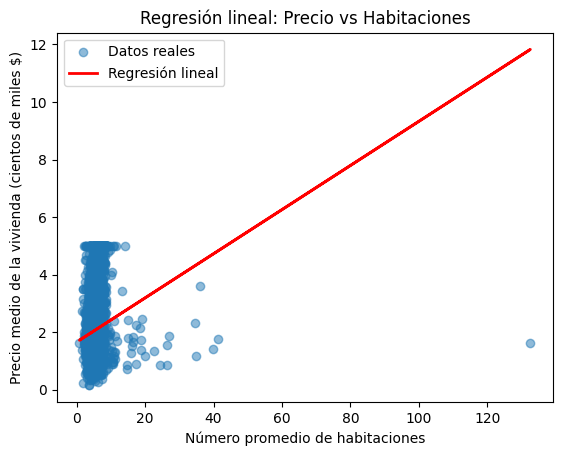

Predicci√≥n: Una casa con 5 habitaciones tiene un precio estimado de 2.04 cientos de miles de d√≥lares.


c:\Users\SergioSF\Desktop\Programacion de Modelos de IA\Ejercicios y apuntes\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [231]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import statsmodels.api as sm

# Cargar el dataset de California Housing
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
# Variable objetivo (precio de la vivienda)
df["MedHouseVal"] = california.target

# Seleccionar una variable para regresi√≥n simple (por ejemplo, la media de habitaciones)
X = df[['AveRooms']]  # Feature: N√∫mero promedio de habitaciones
y = df['MedHouseVal']  # Target: Precio medio de la vivienda

# Dividir los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresi√≥n lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Hacer predicciones
y_pred = modelo.predict(X_test)

# Evaluar el modelo
# Calculamos el Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Error MAE: {mae:.2f} (puntos de progresi√≥n)")
# Calculamos el Coeficiente de determinaci√≥n
r2 = r2_score(y_test, y_pred)
print(f"R¬≤: {r2:.2f}")
# Calculamos el error cuadratico medio
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")
# Calculamos el Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"MAPE: {mape:.2f}%")
# Calculo de la prueba F y P-valor
X_train_const = sm.add_constant(X_train)  # Agregar t√©rmino de intercepto
modelo_stats = sm.OLS(y_train, X_train_const).fit()
print(modelo_stats.summary())  # Muestra F, p-valor y otros coeficientes

# Representar la relaci√≥n entre la variable y el precio
plt.scatter(X_test, y_test, label="Datos reales", alpha=0.5)
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Regresi√≥n lineal")
plt.xlabel("N√∫mero promedio de habitaciones")
plt.ylabel("Precio medio de la vivienda (cientos de miles $)")
plt.title("Regresi√≥n lineal: Precio vs Habitaciones")
plt.legend()
plt.show()

# Funci√≥n para hacer predicciones con nuevas viviendas


def predecir_precio(habitaciones):
    prediccion = modelo.predict([[habitaciones]])[0]
    print(
        f"Predicci√≥n: Una casa con {habitaciones} habitaciones tiene un precio estimado de {prediccion:.2f} cientos de miles de d√≥lares.")


# Probar con un ejemplo nuevo
predecir_precio(5)  # Cambia este valor para probar

3. Dataset DIABETES de Scikit-learn (Poco adecuado)
- üéØ¬†Objetivo:¬†Predecir el nivel de progresi√≥n de la diabetes (`target`) en funci√≥n de factores m√©dicos.
    1. Carga el dataset
    2. Prepara los datos (seleccionando `bmi`como variable independiente)
    3. Entrena un modelo de regresi√≥n lineal
    4. Visualiza la relaci√≥n entre¬†`bmi`¬†y la progresi√≥n de la diabetes
    5. Permite hacer predicciones con nuevos valores de¬†`bmi`
- üìà¬†Ejemplo de regresi√≥n simple:¬†¬øC√≥mo influye el √≠ndice de masa corporal (`bmi`) en la progresi√≥n de la diabetes?<br>

Error MAE: 52.26 (puntos de progresi√≥n)
R¬≤: 0.23
RMSE: 63.73
MAPE: 45.88%
                            OLS Regression Results                            
Dep. Variable:            Progression   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     202.4
Date:                Fri, 21 Feb 2025   Prob (F-statistic):           1.40e-36
Time:                        20:35:43   Log-Likelihood:                -1958.2
No. Observations:                 353   AIC:                             3920.
Df Residuals:                     351   BIC:                             3928.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

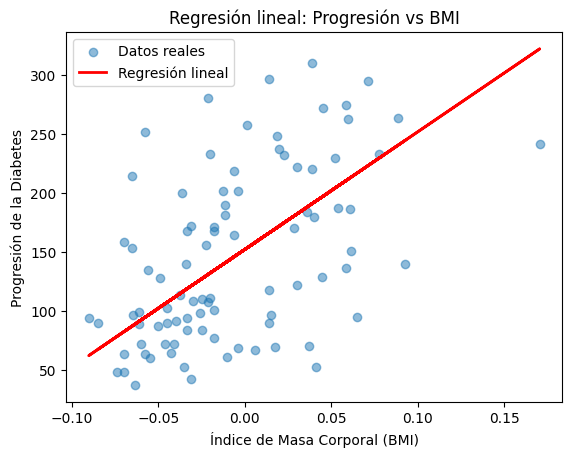

Predicci√≥n: Una persona con BMI=0.05 tiene una progresi√≥n estimada de 201.93 puntos.


c:\Users\SergioSF\Desktop\Programacion de Modelos de IA\Ejercicios y apuntes\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [232]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import statsmodels.api as sm


# Cargar el dataset de Diabetes
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
# Variable objetivo (progresi√≥n de la diabetes)
df["Progression"] = diabetes.target

# Seleccionar una variable para regresi√≥n simple (√çndice de Masa Corporal - BMI)
X = df[['bmi']]  # Feature: √çndice de Masa Corporal
y = df['Progression']  # Target: Nivel de progresi√≥n de la diabetes

# Dividir los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresi√≥n lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Hacer predicciones
y_pred = modelo.predict(X_test)

# Evaluar el modelo
# Calculamos el Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Error MAE: {mae:.2f} (puntos de progresi√≥n)")
# Calculamos el Coeficiente de determinaci√≥n
r2 = r2_score(y_test, y_pred)
print(f"R¬≤: {r2:.2f}")
# Calculamos el error cuadratico medio
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")
# Calculamos el Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"MAPE: {mape:.2f}%")
# Calculo de la prueba F y P-valor
X_train_const = sm.add_constant(X_train)  # Agregar t√©rmino de intercepto
modelo_stats = sm.OLS(y_train, X_train_const).fit()
print(modelo_stats.summary())  # Muestra F, p-valor y otros coeficientes

# Representar la relaci√≥n entre BMI y la progresi√≥n de la diabetes
plt.scatter(X_test, y_test, label="Datos reales", alpha=0.5)
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Regresi√≥n lineal")
plt.xlabel("√çndice de Masa Corporal (BMI)")
plt.ylabel("Progresi√≥n de la Diabetes")
plt.title("Regresi√≥n lineal: Progresi√≥n vs BMI")
plt.legend()
plt.show()

# Funci√≥n para hacer predicciones con nuevos valores de BMI


def predecir_progresion(bmi):
    prediccion = modelo.predict([[bmi]])[0]
    print(
        f"Predicci√≥n: Una persona con BMI={bmi:.2f} tiene una progresi√≥n estimada de {prediccion:.2f} puntos.")


# Probar con un ejemplo nuevo
predecir_progresion(0.05)  # Cambia este valor para probar

### 4. Dataset TIPS de Seaborn (Poco adecuado)

- üîç¬†Objetivo:¬†Relaci√≥n entre la propina (`tip`) y el total de la cuenta (`total_bill`).
    1. Carga de datos
    2. Visualizaci√≥n inicial
    3. Entrenamiento del modelo
    4. Evaluaci√≥n con MAE y R¬≤
    5. Predicci√≥n con un nuevo valor
    6. Representaci√≥n gr√°fica
- üìà¬†Ejemplo de regresi√≥n simple:¬†¬øC√≥mo influye el total de la cuenta en la propina?

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
Error MAE: 0.62 (puntos de progresi√≥n)
R¬≤: 0.54
RMSE: 0.75
MAPE: 26.40%
                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     146.2
Date:                Fri, 21 Feb 2025   Prob (F-statistic):           2.04e-25
Time:                        20:35:44   Log-Likelihood:                -290.84
No. Observations:                 195   AIC:                             585.7
Df Residuals:                     193   BIC:     

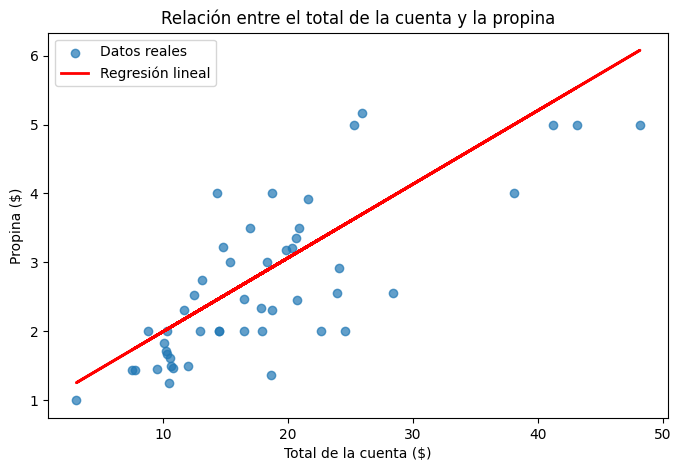

Propina estimada para una cuenta de $50: 6.27 d√≥lares


c:\Users\SergioSF\Desktop\Programacion de Modelos de IA\Ejercicios y apuntes\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [233]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Cargar el dataset
tips = sns.load_dataset("tips")

# Visualizar los primeros datos
print(tips.head())

# Seleccionar las variables
X = tips[['total_bill']]  # Variable independiente (entrada)
y = tips['tip']           # Variable dependiente (objetivo)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Realizar predicciones
y_pred = modelo.predict(X_test)

# Evaluar el modelo
# Calculamos el Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Error MAE: {mae:.2f} (puntos de progresi√≥n)")
# Calculamos el Coeficiente de determinaci√≥n
r2 = r2_score(y_test, y_pred)
print(f"R¬≤: {r2:.2f}")
# Calculamos el error cuadratico medio
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")
# Calculamos el Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"MAPE: {mape:.2f}%")
# Calculo de la prueba F y P-valor
X_train_const = sm.add_constant(X_train)  # Agregar t√©rmino de intercepto
modelo_stats = sm.OLS(y_train, X_train_const).fit()
print(modelo_stats.summary())  # Muestra F, p-valor y otros coeficientes

print(f"MAE (Error Absoluto Medio): {mae:.2f} d√≥lares")
print(f"R¬≤ (Coeficiente de determinaci√≥n): {r2:.2f}")

# Representaci√≥n gr√°fica
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, label="Datos reales", alpha=0.7)
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Regresi√≥n lineal")
plt.xlabel("Total de la cuenta ($)")
plt.ylabel("Propina ($)")
plt.title("Relaci√≥n entre el total de la cuenta y la propina")
plt.legend()
plt.show()

# Predicci√≥n con un nuevo valor
nueva_cuenta = np.array([[50]])  # Ejemplo: cuenta de $50
propina_predicha = modelo.predict(nueva_cuenta)[0]
print(f"Propina estimada para una cuenta de $50: {propina_predicha:.2f} d√≥lares")

### 5. Dataset DIAMONDS de Seaborn (Adecuado)

- üîç¬†Objetivo:¬†Predecir el precio de un diamante seg√∫n sus caracter√≠sticas f√≠sicas.
- üß†¬†Ejemplo de regresi√≥n simple:¬†¬øC√≥mo influye el peso en quilates (`carat`) en el precio (`price`)?

MAE: 1009.50 d√≥lares
R¬≤: 0.85
RMSE: 1549.64


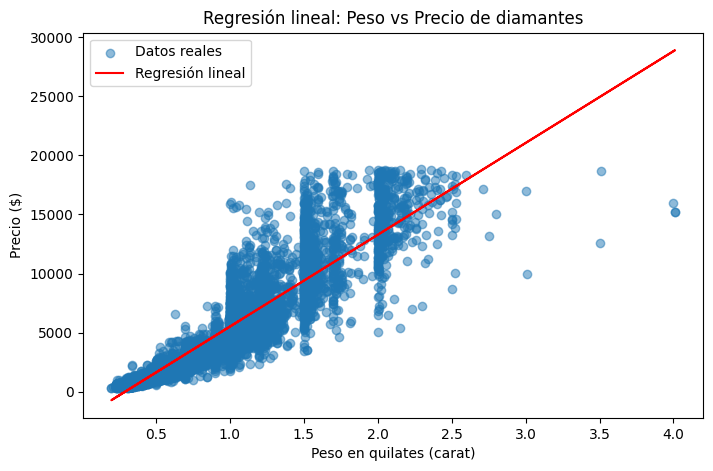

Para un diamante de 1.5 quilates, el precio estimado es de $9391.45


c:\Users\SergioSF\Desktop\Programacion de Modelos de IA\Ejercicios y apuntes\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [234]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# Cargar el dataset de Seaborn
diamonds = sns.load_dataset("diamonds")

# Seleccionar las columnas de inter√©s
df = diamonds[['carat', 'price']]

# Dividir en variables predictoras y objetivo
X = df[['carat']]  # Peso en quilates
y = df['price']    # Precio del diamante

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar modelo de regresi√≥n lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Hacer predicciones
y_pred = modelo.predict(X_test)

# Evaluar modelo
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae:.2f} d√≥lares")
print(f"R¬≤: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")

# Visualizar la regresi√≥n
plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, label="Datos reales", alpha=0.5)
plt.plot(X_test, y_pred, color="red", label="Regresi√≥n lineal")
plt.xlabel("Peso en quilates (carat)")
plt.ylabel("Precio ($)")
plt.title("Regresi√≥n lineal: Peso vs Precio de diamantes")
plt.legend()
plt.show()

# Funci√≥n para predecir precio seg√∫n el peso en quilates
def predecir_precio(peso_carat):
    prediccion = modelo.predict([[peso_carat]])
    return prediccion[0]

# Ejemplo de predicci√≥n
peso_ejemplo = 1.5  # Quilates
precio_predicho = predecir_precio(peso_ejemplo)
print(f"Para un diamante de {peso_ejemplo} quilates, el precio estimado es de ${precio_predicho:.2f}")


### 6. Dataset ficticio VIVIENDAS (Adecuado)

- üîç¬†Objetivo:¬†Predecir el peso de las viviendas en funci√≥n de su superficie
- üß†¬†Ejemplo de regresi√≥n simple:¬†A mayor superficie, mayor precio de la vivienda.

Error MAE: 7387.15 (puntos de progresi√≥n)
R¬≤: 0.85
RMSE: 9342.64
MAPE: 5.24%
                            OLS Regression Results                            
Dep. Variable:                 precio   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     621.8
Date:                Fri, 21 Feb 2025   Prob (F-statistic):           6.58e-39
Time:                        20:35:44   Log-Likelihood:                -845.52
No. Observations:                  80   AIC:                             1695.
Df Residuals:                      78   BIC:                             1700.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

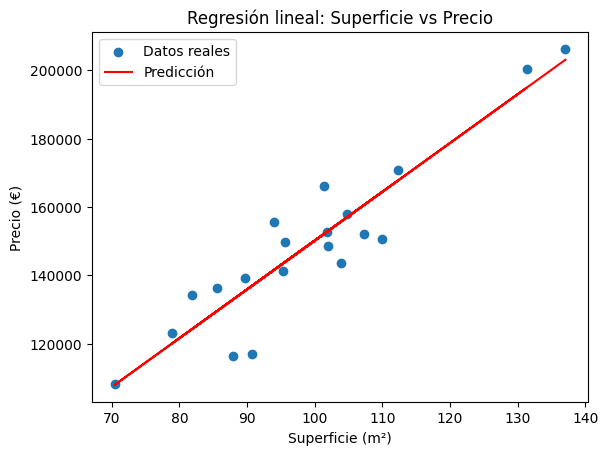

Precio estimado para 50.0 m¬≤: 78683.14 ‚Ç¨


c:\Users\SergioSF\Desktop\Programacion de Modelos de IA\Ejercicios y apuntes\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [235]:
# Generar datos sint√©ticos
np.random.seed(42)
superficie = np.random.normal(100, 20, 100)  # Metros cuadrados
precio = superficie * 1500 + np.random.normal(0, 10000, 100)  # Relaci√≥n con ruido

df = pd.DataFrame({'superficie': superficie, 'precio': precio})

X = df[['superficie']]
y = df['precio']

# Dividir y entrenar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelo = LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

# Evaluar el modelo
# Calculamos el Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Error MAE: {mae:.2f} (puntos de progresi√≥n)")
# Calculamos el Coeficiente de determinaci√≥n
r2 = r2_score(y_test, y_pred)
print(f"R¬≤: {r2:.2f}")
# Calculamos el error cuadratico medio
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")
# Calculamos el Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"MAPE: {mape:.2f}%")
# Calculo de la prueba F y P-valor
X_train_const = sm.add_constant(X_train)  # Agregar t√©rmino de intercepto
modelo_stats = sm.OLS(y_train, X_train_const).fit()
print(modelo_stats.summary())  # Muestra F, p-valor y otros coeficientes

print(f"MAE: {mae:.2f} ‚Ç¨")
print(f"R¬≤: {r2:.2f}")

# Graficar
plt.scatter(X_test, y_test, label="Datos reales")
plt.plot(X_test, y_pred, color="red", label="Predicci√≥n")
plt.xlabel("Superficie (m¬≤)")
plt.ylabel("Precio (‚Ç¨)")
plt.title("Regresi√≥n lineal: Superficie vs Precio")
plt.legend()
plt.show()

# Funci√≥n para predecir precio seg√∫n la superficie
def predecir_precio(superficie):
    superficie = np.array(superficie).reshape(-1, 1)  # Convertir a array 2D
    precio_predicho = modelo.predict(superficie)
    return precio_predicho[0]

# Ejemplo de uso
nueva_superficie = float(50)
precio_estimado = predecir_precio([[nueva_superficie]])
print(f"Precio estimado para {nueva_superficie} m¬≤: {precio_estimado:.2f} ‚Ç¨")

### 7. Dataset ficticio CONSUMO COMBUSTIBLE (Perfecto)

- üîç¬†Objetivo:¬†Predecir el consumo de combustible en funci√≥n del tama√±o del coche
- üß†¬†Ejemplo de regresi√≥n simple:¬†A mayor peso del coche, mayor consumo de combustible.

Error MAE: 0.30 (puntos de progresi√≥n)
R¬≤: 1.00
RMSE: 0.40
MAPE: 0.44%
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.806e+06
Date:                Fri, 21 Feb 2025   Prob (F-statistic):          1.87e-179
Time:                        20:35:44   Log-Likelihood:                -51.453
No. Observations:                  80   AIC:                             106.9
Df Residuals:                      78   BIC:                             111.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

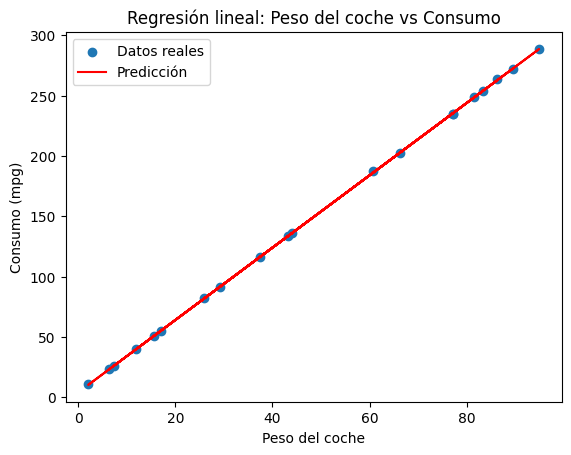

In [236]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Generar datos sint√©ticos
np.random.seed(42)
X = np.random.rand(100, 1) * 100  # 100 datos de entrada entre 0 y 100
y = 3 * X.squeeze() + 4 + np.random.randn(100) * 0.5  # Relaci√≥n casi perfecta con algo de ruido. X.squeeze(): Convierte la matriz de X en un array de una sola dimensi√≥n (para simplificar). Luego, X se multiplica por 3. Esto significa que el consumo (y) est√° altamente relacionado con el peso (X). Se suma 4 a cada valor, lo que act√∫a como un t√©rmino de "intersecci√≥n" en una ecuaci√≥n de recta. Por √∫ltimo, se agrega un poco de ruido aleatorio con una distribuci√≥n normal, para que los datos no sean perfectamente lineales (simulando variaciones reales en los datos).

# Convertir a DataFrame para consistencia con el ejemplo original
cars = pd.DataFrame({'weight': X.squeeze(), 'mpg': y})

# Dividir y entrenar modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelo = LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)


# Evaluar el modelo
# Calculamos el Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Error MAE: {mae:.2f} (puntos de progresi√≥n)")
# Calculamos el Coeficiente de determinaci√≥n
r2 = r2_score(y_test, y_pred)
print(f"R¬≤: {r2:.2f}")
# Calculamos el error cuadratico medio
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")
# Calculamos el Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"MAPE: {mape:.2f}%")
# Calculo de la prueba F y P-valor
X_train_const = sm.add_constant(X_train)  # Agregar t√©rmino de intercepto
modelo_stats = sm.OLS(y_train, X_train_const).fit()
print(modelo_stats.summary())  # Muestra F, p-valor y otros coeficientes

print(f"MAE: {mae:.2f} mpg")
print(f"R¬≤: {r2:.2f}")

# Graficar
plt.scatter(X_test, y_test, label="Datos reales")
plt.plot(X_test, y_pred, color="red", label="Predicci√≥n")
plt.xlabel("Peso del coche")
plt.ylabel("Consumo (mpg)")
plt.title("Regresi√≥n lineal: Peso del coche vs Consumo")
plt.legend()
plt.show()